In [1]:
import tkinter as tk
from tkinter import Label
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Loading the model
cups=keras.saving.load_model('cups.keras')
discs=keras.saving.load_model('discs.keras')

In [5]:
#Image importing
def imageBrowser():
    path= tk.filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg")])
 
    # if file is selected
    if len(path)!=0:
        input=cv2.imread(path)
        input=cv2.resize(input,(128,128))
        input=tf.convert_to_tensor(input)
        input=tf.divide(tf.cast(input, tf.float32), 255.0)

        cup_segment = cups.predict(tf.expand_dims(input, 0))
        cup_segment[0]*=255
        cup=np.zeros((128,128),dtype=np.uint8)
        for i in range(128):
            for j in range(128):
                cup[i][j]=cup_segment[0][i][j][0]
        cup = cv2.GaussianBlur(cup,(5,5),0)
        __,cup = cv2.threshold(cup,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        disc_segment = discs.predict(tf.expand_dims(input, 0))
        disc_segment[0]*=255
        disc=np.zeros((128,128),dtype=np.uint8)
        for i in range(128):
            for j in range(128):
                disc[i][j]=disc_segment[0][i][j][0]
        disc = cv2.GaussianBlur(disc,(5,5),0)
        __,disc = cv2.threshold(disc,0,128,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        joined = np.where((cup == 255), 255, np.where((disc == 128), 128, 0))
        
        cup_count=np.count_nonzero(cup)
        disc_count=np.count_nonzero(disc)

        CDR=cup_count/disc_count
        print("CDR = ",CDR)

        plt.imshow(joined,'gray')

        app.destroy()
        
 
    # if no file is selected, then we are displaying below message
    else:
        print("Bad file path.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
CDR =  0.3155893536121673


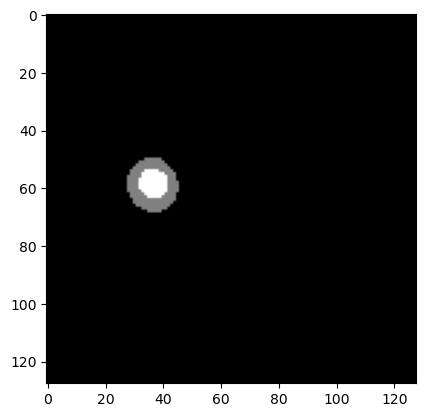

In [8]:
app = tk.Tk()

app.title("Optic Disk and Cup Segmentation")
app.geometry("200x100")
app.option_add("*Button*Background", "lightblue")
 
label = tk.Label(app)
label.pack(side=tk.LEFT,pady=10)


# defining our upload buttom
uploadButton = tk.Button(app, text="Upload Image", command=imageBrowser)
uploadButton.pack(side=tk.BOTTOM, pady=20)

app.mainloop()
